In [11]:
import numpy as np

In [12]:
betas_mgpcg = np.loadtxt("experiments/2d/mgpcg/betas.dat")
betas_mgpcg_faster = np.loadtxt("experiments/2d/mgpcg_faster/betas.dat")

In [13]:
# remove zeros
betas_mgpcg = betas_mgpcg[betas_mgpcg != 0]
betas_mgpcg_faster = betas_mgpcg_faster[betas_mgpcg_faster != 0]

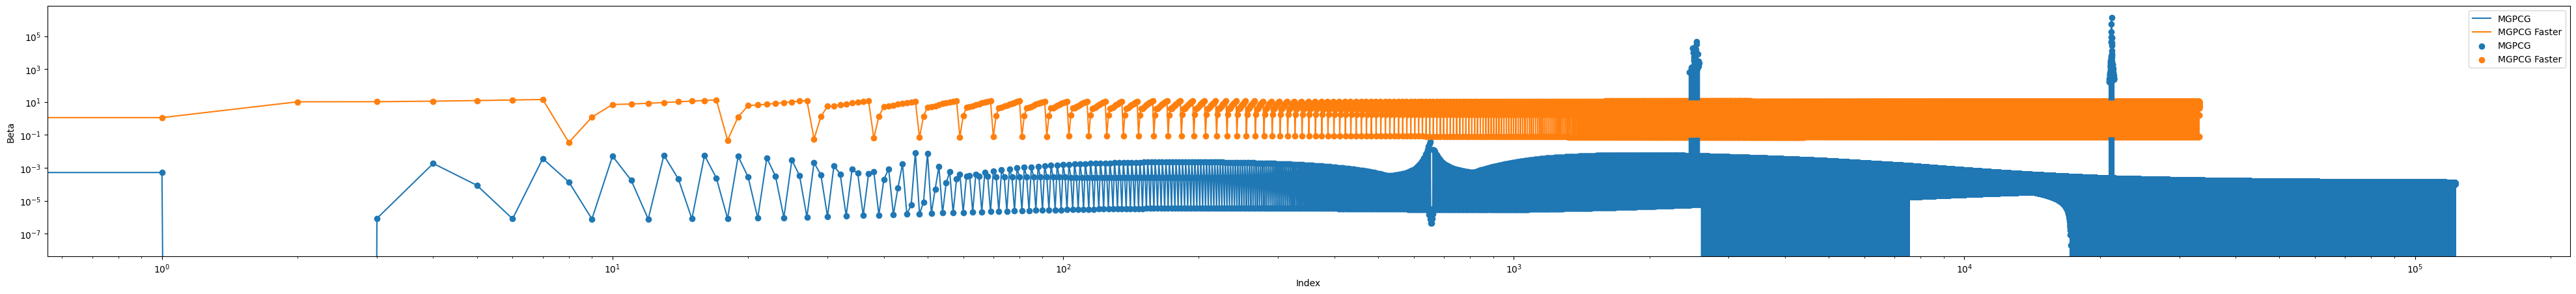

In [14]:
# plot the betas with scatter plot
import matplotlib.pyplot as plt
# wide figure
fig, ax = plt.subplots(figsize=(50, 5))
ax.plot(betas_mgpcg, label="MGPCG")
ax.plot(betas_mgpcg_faster, label="MGPCG Faster")
# scatter plot additionally
ax.scatter(range(len(betas_mgpcg)), betas_mgpcg, label="MGPCG")
ax.scatter(range(len(betas_mgpcg_faster)), betas_mgpcg_faster, label="MGPCG Faster")
ax.set_xlabel("Index")
ax.set_ylabel("Beta")
ax.set_yscale("log")
ax.set_xscale("log")
ax.legend()
plt.show()

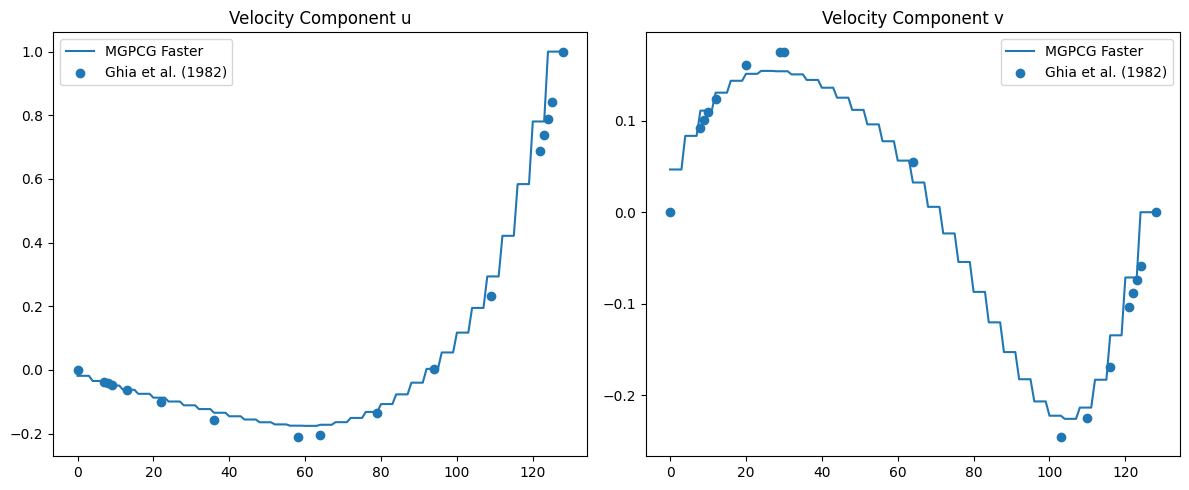

In [15]:
# Ghia et al. (1982) - Re = 100
reference_ux_RE_100 = {
    128: 1.00000,
    125: 0.84123,
    124: 0.78871,
    123: 0.73722,
    122: 0.68717,
    109: 0.23151,
    94: 0.00332,
    79: -0.13641,
    64: -0.20581,
    58: -0.21090,
    36: -0.15662,
    22: -0.10150,
    13: -0.06434,
    9: -0.04775,
    8: -0.04192,
    7: -0.03717,
    0: 0.00000
}

# Ghia et al. (1982) - Re = 100
reference_uy_RE_100 = {
    128: 0.00000,
    124: -0.05906,
    123: -0.07391,
    122: -0.08864,
    121: -0.10313,
    116: -0.16914,
    110: -0.22445,
    103: -0.24533,
    64: 0.05454,
    30: 0.17527,
    29: 0.17507,
    20: 0.16077,
    12: 0.12317,
    10: 0.10890,
    9: 0.10091,
    8: 0.09233,
    0: 0.00000
}

u = np.loadtxt("experiments/2d/mgpcg_faster/u.dat")
v = np.loadtxt("experiments/2d/mgpcg_faster/v.dat")

u = u[1:-1, 1:-1]
v = v[1:-1, 1:-1]

scale_factor = 4
u = np.kron(u, np.ones((scale_factor, scale_factor)))
v = np.kron(v, np.ones((scale_factor, scale_factor)))

# Extract the mid-column of u and mid-row of v
u_mid = u[:, int(u.shape[1]/2)]
v_mid = v[int(v.shape[0]/2), :]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 2 subplots side by side

# Plot u and its reference
axes[0].plot(u_mid, label="MGPCG Faster")
axes[0].scatter(reference_ux_RE_100.keys(), reference_ux_RE_100.values(), label="Ghia et al. (1982)")
axes[0].set_title("Velocity Component u")
axes[0].legend()

# Plot v and its reference
axes[1].plot(v_mid, label="MGPCG Faster")
# plot v_mid as scatter plot
axes[1].scatter(reference_uy_RE_100.keys(), reference_uy_RE_100.values(), label="Ghia et al. (1982)")
axes[1].set_title("Velocity Component v")
axes[1].legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()